# Feature selection with L1 Regularization

* Consider a supervised learning setting where you have data $\mathcal{D} = \{(X, Y)\}$, where $X \in \mathbb{R}^{NXD}$. $N$  - num of datapoints and $D$ - num of features. Many of the features may be irrelevant for the task at hand.
* Typically when there are more features than samples, ie. $D >> N$, a simple linear regression model is prone to overfit.
* As we have seen before, regularization is one of the tools in our toolbox to combat overfitting. Here we will see how they do that and how $L1$ regularization can be used for feature selection.

## Tasks

1.  Load the data "cancer_reg.csv" data from [here](https://data.world/nrippner/ols-regression-challenge). A slightly modified copy will be shared with you on workplace.
2. Preprocess your data particularly making sure there are no nan values.
3. Split the data into 20\% train and 80\% test sets.
4. Define your linear regression model with and without regularization ($L1$ and $L2$)
5. Train and test your linear regression models (without regularization) till it overfits the data. Plot the learning curves for training and testing (You may ignore loss values for the first 10 epochs)
6. Train and test again with regularization and visually inspect the effects.
7. Plot the weights for each model (using matplotlib stem plot). Do you see any difference between them?
8. In the case of the $L1$ regularization, set a small threshold and remove all features of the data corresponding to the weights with values below this threshold.
9. Train a new model with remaining features (with or without regularization)


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### 1. Load the data

In [1487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('cancer-mortality-rate.csv', index_col = 0)
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctMarriedHouseholds-8,PctMarriedHouseholds-9,BirthRate-2,BirthRate-3,BirthRate-4,BirthRate-5,BirthRate-6,BirthRate-7,BirthRate-8,BirthRate-9
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,6.091992e+13,3.219988e+15,37.440093,229.089604,1401.760576,8577.136107,52482.046553,321128.774915,1.964933e+06,1.202309e+07
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,1.796146e+13,8.149565e+14,18.775717,81.356978,352.527560,1527.535610,6618.957797,28680.576760,1.242757e+05,5.384984e+05
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,7.720681e+13,4.203515e+15,13.909079,51.873742,193.462489,721.515996,2690.885118,10035.623263,3.742773e+04,1.395863e+05
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,4.592263e+13,2.343042e+15,21.195350,97.580016,449.242856,2068.242577,9521.859503,43837.125013,2.018191e+05,9.291432e+05
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,7.259662e+13,3.922211e+15,46.194552,313.968540,2133.936595,14503.635908,98576.244063,669988.956897,4.553685e+06,3.094984e+07


In [1488]:
data.shape

(3047, 280)

### 2. Preprocess data

In [1489]:
data.info

<bound method DataFrame.info of       avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0         61898      260131     

In [1490]:
def check_nan(data):
    return data.loc[:, data.isnull().any()].columns

In [1491]:
check_nan(data)

Index(['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone',
       'PctSomeCol18_24-2', 'PctSomeCol18_24-3', 'PctSomeCol18_24-4',
       'PctSomeCol18_24-5', 'PctSomeCol18_24-6', 'PctSomeCol18_24-7',
       'PctSomeCol18_24-8', 'PctSomeCol18_24-9', 'PctEmployed16_Over-2',
       'PctEmployed16_Over-3', 'PctEmployed16_Over-4', 'PctEmployed16_Over-5',
       'PctEmployed16_Over-6', 'PctEmployed16_Over-7', 'PctEmployed16_Over-8',
       'PctEmployed16_Over-9', 'PctPrivateCoverageAlone-2',
       'PctPrivateCoverageAlone-3', 'PctPrivateCoverageAlone-4',
       'PctPrivateCoverageAlone-5', 'PctPrivateCoverageAlone-6',
       'PctPrivateCoverageAlone-7', 'PctPrivateCoverageAlone-8',
       'PctPrivateCoverageAlone-9'],
      dtype='object')

In [1492]:
data.fillna(data.mean(), inplace = True)

In [1493]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctMarriedHouseholds-8,PctMarriedHouseholds-9,BirthRate-2,BirthRate-3,BirthRate-4,BirthRate-5,BirthRate-6,BirthRate-7,BirthRate-8,BirthRate-9
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,6.091992e+13,3.219988e+15,37.440093,229.089604,1401.760576,8577.136107,52482.046553,321128.774915,1.964933e+06,1.202309e+07
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,1.796146e+13,8.149565e+14,18.775717,81.356978,352.527560,1527.535610,6618.957797,28680.576760,1.242757e+05,5.384984e+05
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,7.720681e+13,4.203515e+15,13.909079,51.873742,193.462489,721.515996,2690.885118,10035.623263,3.742773e+04,1.395863e+05
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,4.592263e+13,2.343042e+15,21.195350,97.580016,449.242856,2068.242577,9521.859503,43837.125013,2.018191e+05,9.291432e+05
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,7.259662e+13,3.922211e+15,46.194552,313.968540,2133.936595,14503.635908,98576.244063,669988.956897,4.553685e+06,3.094984e+07


In [1582]:
X = data.drop(columns = ["TARGET_deathRate"], axis = 1)
Y = data["TARGET_deathRate"]

In [1583]:
Y

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [1692]:
def normalize_data(data):
    return data / data.max()

In [1693]:
def split_data(X,y, percent_train):
    X_scale = normalize_data(X)
    X_arr = X_scale.to_numpy()
    y_arr = y.to_numpy()
    indices = np.arange(len(X_arr))
    np.random.shuffle(indices)
    train_size = int(len(indices) * percent_train)
    X_train, X_test = X_arr[:train_size] , X_arr[train_size:]
    y_train, y_test = y_arr[:train_size] , y_arr[train_size:]
    return X_train, y_train, X_test, y_test

In [1694]:
# def split_data(X,y, percent_train):
    
#     X_arr = X.to_numpy()
#     y_arr = y.to_numpy()
    
    
#     indices = np.arange(len(X_arr))
#     np.random.shuffle(indices)
   
#     X_arr= X_arr[indices]
#     y_arr = y_arr[indices]
    
#     X_arr = X_arr /X_arr.max(axis = 0)

    
#     train_size = int(len(indices) * percent_train)
    
   
    
#     X_train, X_test = X_arr[:train_size] , X_arr[train_size:]
#     y_train, y_test = y_arr[:train_size], y_arr[train_size:]
#     return X_train, y_train, X_test, y_test

In [1695]:
X_train, y_train, X_test, y_test  = split_data(X,Y, 0.2)

### Using BGD

### Linear Regression model

In [1696]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 1000, l1 = 0.1, l2 = 0.2):
        self.lr = lr
        self.n_iters = n_iters
        self.l1 = l1
        self.l2 = l2
        
    def fit(self, X, y):
        # init our weights
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        costs = []
        for _ in range(self.n_iters):
            gradient = X.T @ (X @ self.theta - y)
            self.theta  = self.theta - self.lr * gradient
            costs.append(self.MSE(X @ self.theta, y))
        return costs
    
    def predict(self, X):
        y_pred = X @ self.theta
        return y_pred
        
    def MSE(self, y_pred,y):
        return np.sum((y_pred - y)**2) / len(y) #/ len(y) # np.mean((y_predict-y)**2)

In [1697]:
model = LinearRegression(lr = 0.0001, n_iters = 10000, l1 = 0.0, l2 = 0.0)

In [1698]:
cost = model.fit(X_train,y_train)

In [1699]:
cost[-1]

302.6881925351214

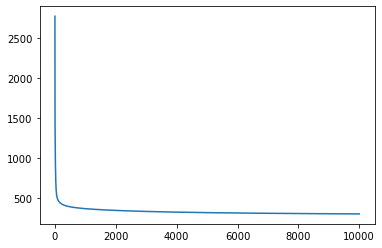

In [1700]:
plt.plot(np.arange(len(cost)), cost)

In [1701]:
y_pred = model.predict(X_test)
y_pred

array([169.8497845 , 165.58756316, 168.54516483, ..., 162.47494141,
       173.92326626, 174.55313663])

In [1702]:
model.MSE(y_pred,y_test)

453.3523705650347

##### Linear Regression with regularization

In [1703]:
class LinearRegression_Reg:
    def __init__(self, lr = 0.001, n_iters = 1000, l1 = .01, l2 = 0.2):
        self.lr = lr
        self.n_iters = n_iters
        self.l1 = l1
        self.l2 = l2
        
    def fit(self, X, y):
        # init our weights
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        costs = []
        
        for _ in range(self.n_iters):
            l1_norm_grad = ((self.theta > 0).astype(float) * 2 - 1) * self.l1
            l2_norm_grad = self.theta * self.l2
            
            gradient = X.T @ (X @ self.theta - y) + l1_norm_grad + l2_norm_grad
            
            #gradient = (X.T @ X + self.l1 * np.identity(X.shape[1])) @ self.theta - X.T @ y
            self.theta  = self.theta - self.lr * gradient
            costs.append(self.MSE(X @ self.theta, y))
        return costs
    
    def predict(self, X):
        y_pred = X @ self.theta
        return y_pred
        
    def MSE(self, y_pred,y):
        return np.sum((y_pred-y)**2) / len(y) # np.mean((y_predict-y)**2)

In [1704]:
model = LinearRegression_Reg(lr = 0.0001, n_iters = 10000, l1 =0.9, l2 = 0)

In [1705]:
costs = model.fit(X_train, y_train)
costs[-1]

303.6372394176419

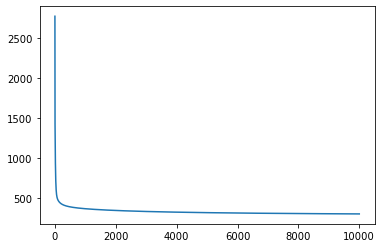

In [1706]:
plt.plot(np.arange(len(costs)),costs)

In [1707]:
y_pred = model.predict(X_test)
y_pred

array([169.84496197, 165.39447586, 168.56031445, ..., 162.54858974,
       173.84528463, 174.41859289])

In [1708]:
model.MSE(y_pred, y_test)

451.3978448177836

In [1709]:
import random

### Using SGD

In [2074]:
class LR_SGD_Reg:
    def __init__(self, lr = 0.001, n_iters = 1000, l1 = 0.9, l2 = 0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.l1 = l1
        self.l2 = l2
        
    def fit(self, X,y):
        n, d = X.shape
        # init theta
        self.theta = np.zeros(d)
        costs = []
        #n_iters_list = []
        for i in range(self.n_iters):
            random_index = random.randint(0,n-1)
            X_sample = X[random_index]
            y_sample = y[random_index]
            l1_norm_grad = ((self.theta > 0).astype(float) * 2 - 1) * self.l1
            l2_norm_grad = self.theta * self.l2
            gradient = X_sample.T @ (X_sample @ self.theta - y_sample * np.identity(d)) + l1_norm_grad + l2_norm_grad
            self.theta = self.theta - self.lr * gradient
            cost = self.MSE(X_sample @ self.theta, y_sample * np.identity(d))
            #cost = np.sum((X_sample @ self.theta - y_sample * np.identity(d))**2) / len(y_sample * np.identity(d))
            costs.append(cost)
            #if i%100 == 0 :
              #  costs.append(cost)
              #  n_iters_list.append(i)
        return costs #, self.theta #, n_iters_list
                   
    def predict(self,X):
        return X @ self.theta
    
    def MSE(self, yh, y):
        return np.sum((yh - y)**2) / len(y)

In [2075]:
model = LR_SGD_Reg(lr = 1e-6, n_iters = 100, l1 = 0, l2 = 0)

In [2076]:
cost = model.fit(X_train, y_train)
cost[-1]

36338.882023259284

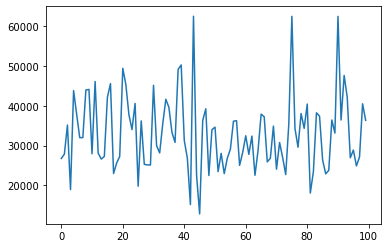

In [2077]:
plt.plot(np.arange(len(cost)),cost)

In [2078]:
y_h = model.predict(X_test)
y_h

array([0.24651765, 0.22256727, 0.2010838 , ..., 0.21978685, 0.24958218,
       0.19549152])

In [2079]:
model.MSE(y_h, y_test)

32673.23358926567

In [1978]:
y_test

array([140.9, 151.2, 171.7, ..., 153.9, 175. , 213.6])

### Using MBGD

In [2220]:
class LR_MBGD:
    
    def __init__(self, lr = 0.001, epochs = 1000, batch_size = 32):
        self.lr = lr
        self.epochs = epochs     
        self.batch_size = batch_size
    
    def fit(self,X,y):
        n, d = X.shape
        no_epochs = n // self.batch_size
        # init theta
        self.theta = np.zeros(d)
        costs = []
        for i in range(no_epochs - 1):
            # a batch example of the dataset
            x_b = X[i * self.batch_size : (i+1) * self.batch_size, :]
            #print(x_b.shape)
            y_b = y[i * self.batch_size : (i+1) * self.batch_size]
            #print(y_b.shape)
            # compute the gradient
            gradient = x_b.T @ (x_b @ self.theta - y_b)
            
            # updates of theta
            self.theta -= self.lr * gradient
            
            costs.append(self.MSE(x_b @ self.theta, y_b))
        return costs
    
    def predict(self,X):
        return X @ self.theta
    
    def MSE(self, yh, y):
        n = len(y)
        return np.sum((yh - y)**2) / n

In [2221]:
model = LR_MBGD(lr = 1e-6, epochs = 10000, batch_size=40)

In [2222]:
cost = model.fit(X_train, y_train)
cost[-1]

40522.91287171112

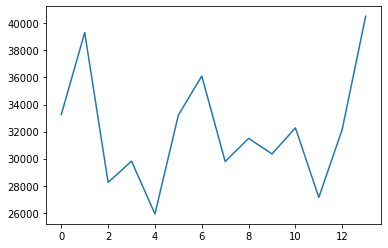

In [2223]:
plt.plot(np.arange(len(cost)),cost)

In [2224]:
y_h = model.predict(X_test)
y_h

array([1.42071927, 1.2989942 , 1.15879993, ..., 1.28374188, 1.46044206,
       1.12483068])

In [2225]:
model.MSE(y_h,y_test)

32289.65424602315